In [2]:
import kagglehub

# Download latest version
path = kagglehub.model_download("google/arbitrary-image-stylization-v1/tensorFlow1/256")

print("Path to model files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 81.8M/81.8M [00:19<00:00, 4.50MB/s]
Extracting model files...


Path to model files: C:\Users\arunj\.cache\kagglehub\models\google\arbitrary-image-stylization-v1\tensorFlow1\256\2


In [4]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
# Load the model
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

### 1. Preprocess Image and Load

In [7]:

def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [31]:
content_image = load_image('park.jpeg')
style_image = load_image('monet.jpeg')

### 2. Visualize Output

In [32]:
content_image.shape

TensorShape([1, 183, 275, 3])

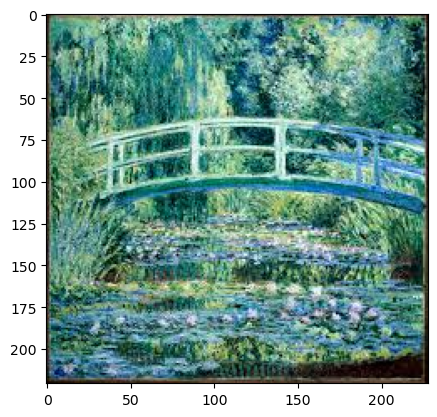

In [33]:
plt.imshow(np.squeeze(style_image))
plt.show()

### 3. Stylize Image

In [34]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

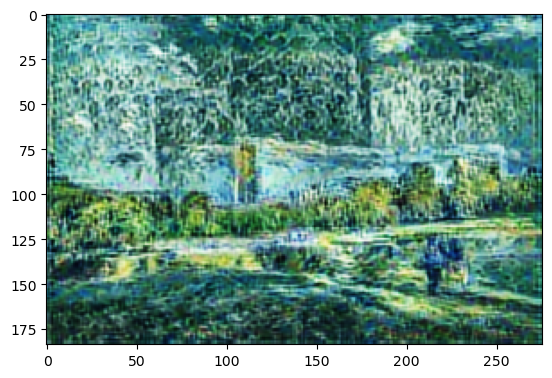

In [35]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [30]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True